In [2]:
!pip install spacy
!pip install newsapi-python

In [3]:
!pip install newsapi

In [4]:
!python -m spacy download en_core_web_lg

     |████████████████████████████████| 827.9 MB 1.4 MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-py3-none-any.whl size=829180942 sha256=34ccbf5576044dc75f3c0b96e964a8c6ddd20763037592d961189ac1c5f47bc5
  Stored in directory: /tmp/pip-ephem-wheel-cache-sbrx3nt7/wheels/11/95/ba/2c36cc368c0bd339b44a791c2c1881a1fb714b78c29a4cb8f5
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [5]:
!pip install wordcloud

Total Results: 100
Articles: 
[{'source': {'id': None, 'name': 'New York Times'}, 'author': 'Joseph Berger', 'title': 'Rabbi Chaim Kanievsky, Venerated Talmudic Scholar, Dies at 94', 'description': 'He initially insisted, “Canceling Torah study is more dangerous than the coronavirus.” But he had a change of heart, even before testing positive.', 'url': 'https://www.nytimes.com/2022/03/18/obituaries/rabbi-chaim-kanievsky-dea.html', 'urlToImage': 'https://static01.nyt.com/images/2022/03/19/obituaries/19Kanievsky-obit1/00Kanievsky1-facebookJumbo.jpg', 'publishedAt': '2022-03-18T20:26:55Z', 'content': 'Most significant was his ruling that instances of sexual abuse of children should be reported to the civic authorities and not handled exclusively within the Haredi community. This was a sharp depart… [+1849 chars]'}, {'source': {'id': None, 'name': 'New York Times'}, 'author': 'Emma G. Fitzsimmons', 'title': 'Can Eric Adams Cheerlead New Yorkers Past the Pandemic?', 'description': 'The mayo

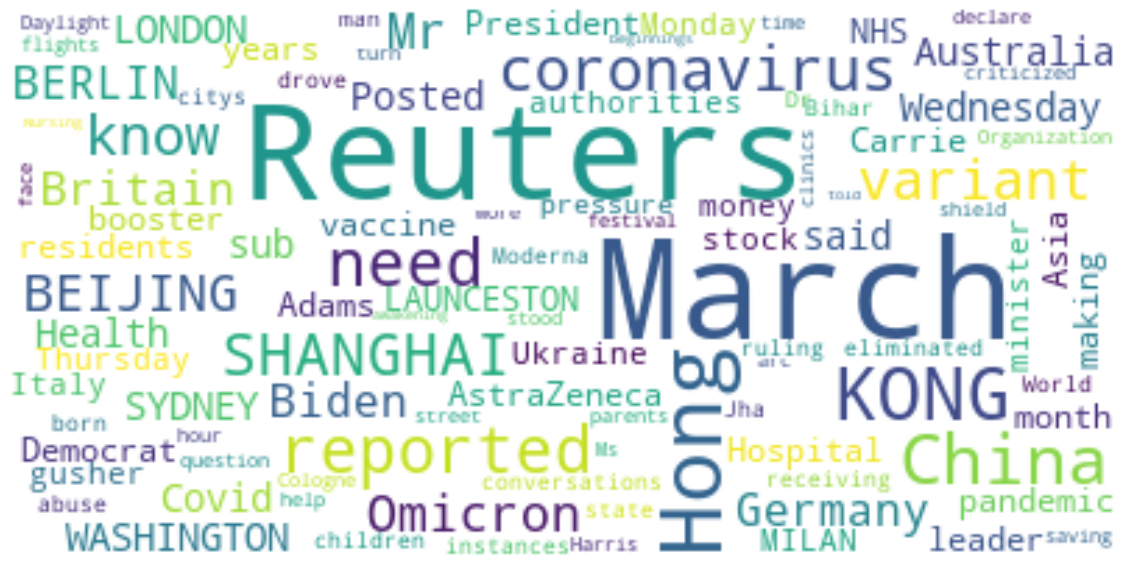

In [38]:
# Preni Amijanian
# CS4650 HW5 News API + Covid Dataset
import spacy
import newsapi
from newsapi.newsapi_client import NewsApiClient
import en_core_web_lg
import pickle
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import string
import matplotlib.pyplot as plt
%matplotlib inline


nlp_eng = en_core_web_lg.load()
newsapi = NewsApiClient(api_key='bc0806d1145a4f2b81498bdeee8f1ad6')

totalResult = 0
articles = []

# i is current page, start from 1 and end with 5
for i in range(1, 6):
  temp = newsapi.get_everything(q='coronavirus', language='en', from_param='2022-02-27', to='2022-03-26', sort_by='relevancy', page=i)
  for item in temp['articles']:
    articles.append(item)
  totalResult += len(temp['articles'])

print('Total Results: %d' % totalResult)
print('Articles: ')
print(articles)
print()

filename = 'articlesCOVID.pckl'
pickle.dump(articles, open(filename, 'wb'))
filename = 'articlesCOVID.pckl'
loaded_model = pickle.load(open(filename, 'rb'))
#print(loaded_model)
#print(len(loaded_model))

# instead of dados = []
dados = {
    'title': [],
    'description': [],
    'content': []
}

for i, article in enumerate(loaded_model):
  title = article['title']
  description = article['description']
  content = article['content']
  dados['title'].append(title)
  dados['description'].append(description)
  dados['content'].append(content)
        
df = pd.DataFrame(dados)
df = df.dropna()
df.head()

df.to_excel('covArticles.xlsx', index = True, header=True)
print(df)


def get_keywords_eng(text, nlp):
  result = []
  pos_tag = ['VERB', 'NOUN', 'PROPN'] 
  dat = nlp(text)
  for token in dat:
    if token.text in nlp_eng.Defaults.stop_words or token.text in string.punctuation:
      continue          
    if token.pos_ in pos_tag:
      result.append(token.text)
  return result

def generate_word_cloud(articles, contnt): 
  results = []
  for _, article in enumerate(articles):
    item = article[type]
    if item is None:
      continue

    for keyword in Counter(get_keywords_eng(item, nlp_eng)).most_common(5):
      results.append(keyword[0])
    
  text = ' '.join(results)

  wordcloud = WordCloud(max_font_size=50, max_words=100, collocations=False, background_color='white').generate(text)  
  plt.figure(figsize=(20,15))
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis('off')
  plt.show()
  return wordcloud


wordcloud = generate_word_cloud(articles, 'content')